Epoch [1/10], Step [100/938], Loss: 0.6496
Epoch [1/10], Step [200/938], Loss: 0.3572
Epoch [1/10], Step [300/938], Loss: 0.5394
Epoch [1/10], Step [400/938], Loss: 0.2782
Epoch [1/10], Step [500/938], Loss: 0.4758
Epoch [1/10], Step [600/938], Loss: 0.3182
Epoch [1/10], Step [700/938], Loss: 0.5136
Epoch [1/10], Step [800/938], Loss: 0.3497
Epoch [1/10], Step [900/938], Loss: 0.1717
Epoch [1/10], Accuracy: 0.8789, Avg Loss: 0.3330
Epoch [2/10], Step [100/938], Loss: 0.2269
Epoch [2/10], Step [200/938], Loss: 0.1219
Epoch [2/10], Step [300/938], Loss: 0.4058
Epoch [2/10], Step [400/938], Loss: 0.3932
Epoch [2/10], Step [500/938], Loss: 0.2210
Epoch [2/10], Step [600/938], Loss: 0.4882
Epoch [2/10], Step [700/938], Loss: 0.2578
Epoch [2/10], Step [800/938], Loss: 0.3412
Epoch [2/10], Step [900/938], Loss: 0.3595
Epoch [2/10], Accuracy: 0.8923, Avg Loss: 0.2915
Epoch [3/10], Step [100/938], Loss: 0.1451
Epoch [3/10], Step [200/938], Loss: 0.3100
Epoch [3/10], Step [300/938], Loss: 0.1080

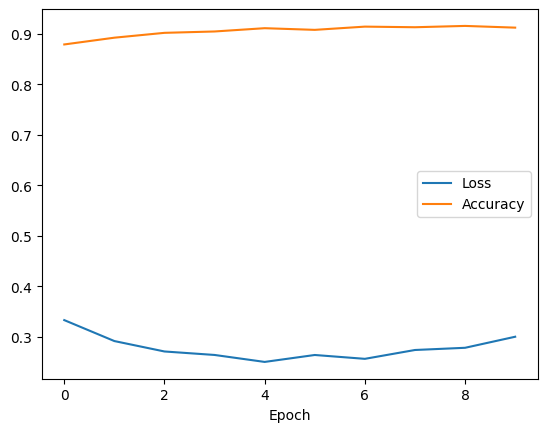

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# تعیین پارامترها
batch_size = 64
learning_rate = 0.001
num_epochs = 10

# تبدیل‌های مورد نیاز برای داده‌ها
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# دریافت داده‌های آموزش و ارزیابی
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# ساخت دسته‌بندی‌کننده‌ها
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# ساخت مدل
class FashionMNISTClassifier(nn.Module):
    def __init__(self):
        super(FashionMNISTClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(32*7*7, 256)
        self.fc2 = nn.Linear(256, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

model = FashionMNISTClassifier()

# تعریف تابع هدف و الگوریتم بهینه‌سازی
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# آموزش مدل
losses = []
accuracies = []
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')
    
    # محاسبه لاس و دقت برای ارزیابی
    correct = 0
    total = 0
    total_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            total_loss += criterion(outputs, labels).item()
    
    accuracy = correct / total
    loss_avg = total_loss / len(test_loader)
    accuracies.append(accuracy)
    losses.append(loss_avg)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Accuracy: {accuracy:.4f}, Avg Loss: {loss_avg:.4f}')

# نمایش نمودار لاس و دقت
plt.plot(losses, label='Loss')
plt.plot(accuracies, label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


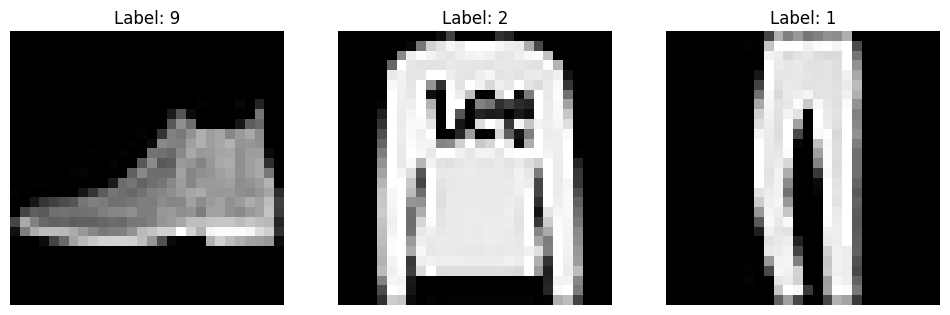

In [2]:
def show_data(dataset, num_images=3):
    fig, axs = plt.subplots(1, num_images, figsize=(12, 4))
    for i in range(num_images):
        img, label = dataset[i]
        axs[i].imshow(img.squeeze(), cmap='gray')
        axs[i].set_title(f'Label: {label}')
        axs[i].axis('off')
    plt.show()

# نمایش سه تصویر اول از مجموعه داده ارزیابی
show_data(test_dataset)